![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

<h1 style="color: #00BFFF;">00 | Random Variable Distributions</h1>

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import math
import matplotlib.pyplot as plt # 2D visualizations
import os # filemanagment
import seaborn as sns # high-resolution visualization

# ⚙️ Settings
pd.set_option('display.max_columns', None)

# 🔄 Functions
import sys # system path to our functions
module = "C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/usefulness/easy"
sys.path.append(os.path.abspath(module))

from functions import open_data  # quick data overview
from functions import snake_columns  # snake_case
from functions import explore_data  # checks for duplicates, NaN & empty spaces

In [2]:
file_path = os.path.join('C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-random-variable-distributions/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data = pd.read_csv(file_path, index_col=0).fillna(0)

<h3 style="color: #008080;">1. Get the numerical variables from our dataset.
</h3>

In [3]:
snake_columns(data)

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,,,,,,,,,,


In [4]:
n = data.select_dtypes(include=np.number)

In [5]:
n.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247


<h3 style="color: #008080;">2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
</h3>

In [6]:
n.shape

(9134, 8)

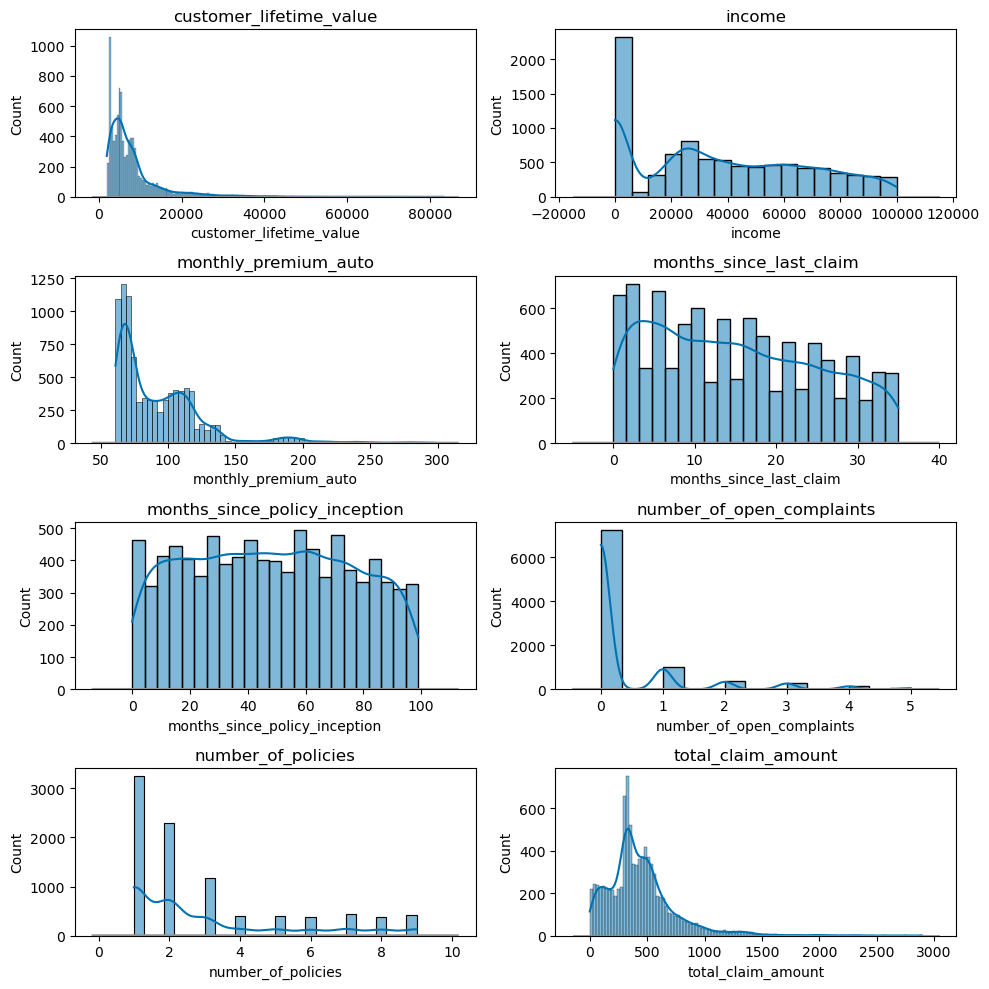

In [7]:
# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(n.columns):
        break
    sns.histplot(n.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(n.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(n.columns[i])
plt.tight_layout()
plt.show()

<h3 style="color: #008080;">3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
</h3>

In [8]:
n.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [9]:
# We will drop the discrete distributions, treating them like categoricals
n.drop('number_of_policies', axis=1, inplace=True)
n.drop('number_of_open_complaints', axis=1, inplace=True)
n.drop('months_since_policy_inception', axis=1, inplace=True)
n.drop('months_since_last_claim', axis=1, inplace=True)

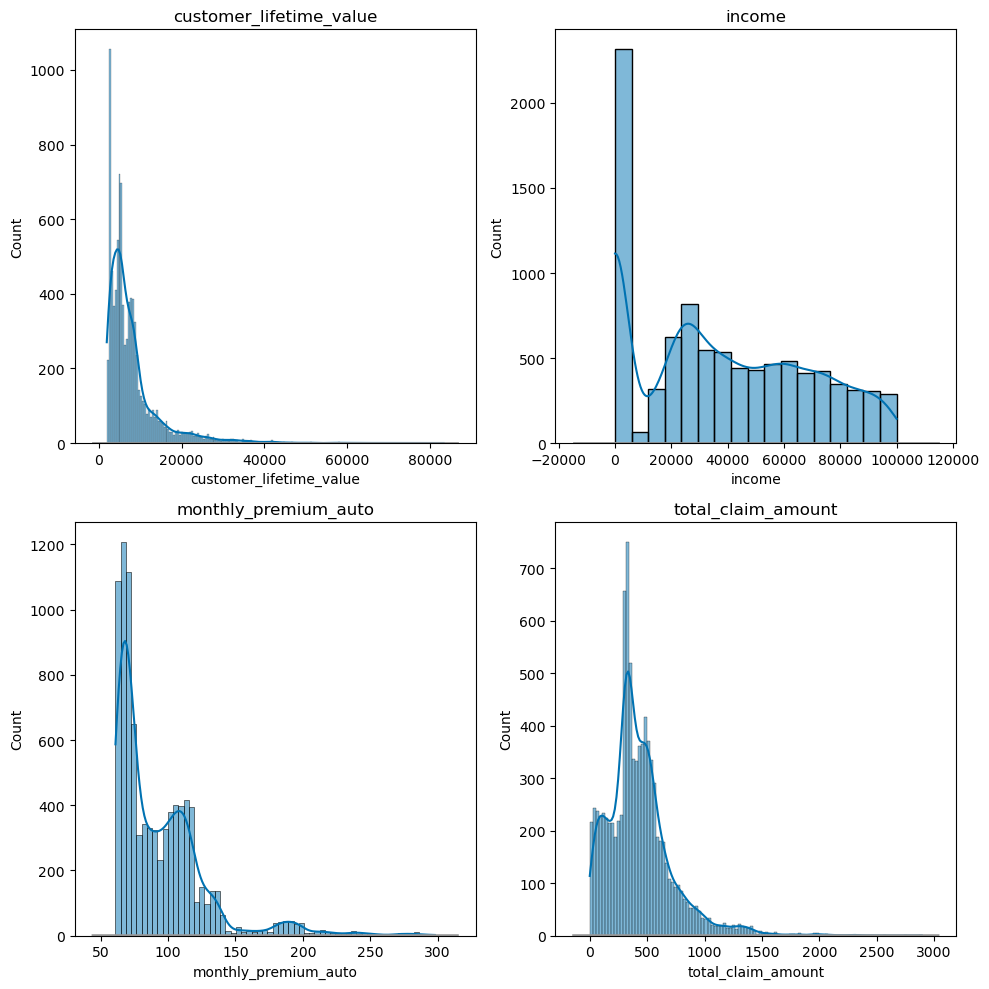

In [10]:
# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(n.columns):
        break
    sns.histplot(n.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(n.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(n.columns[i])
plt.tight_layout()
plt.show()

In [11]:
n_log = np.log(n)

C:\Users\apisi\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


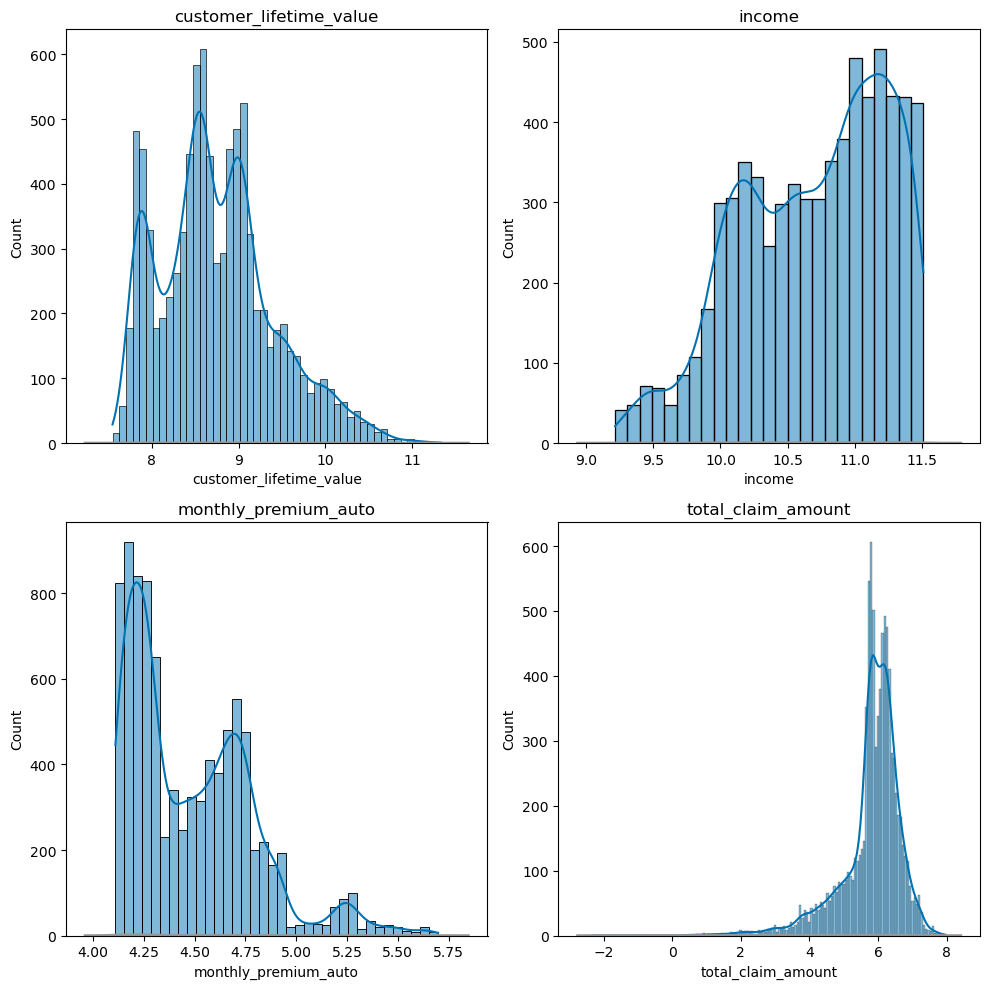

In [12]:
# set color palette
colors = ['#0072B2'] # blue

# plot normalized features in a grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(n_log.columns):
        break
    sns.histplot(n_log.iloc[:, i], ax=ax, color=colors[i % len(colors)], kde=True)
    sns.kdeplot(n_log.iloc[:, i], ax=ax, color='#999999', linewidth=2)
    ax.set_title(n_log.columns[i])
plt.tight_layout()
plt.show()

In [14]:
# Again, sorry for this lab. I also did in a rush and I hope to get back to it to make it better.
# I dropped some columns as an advice, treating them as categoricals.
# After doing log transform, it improved customer_lifetime_value, income, making more like a bell-shape normal distribution
# It did not change much the result of monthly_premium_auto (is still positivly skewed) and total_claim_amount changed from being positivly skewed to being negativly skewed

# Again, this is the response from Sunday. I'll get back on it on Monday. Sorry for this lab, Camille!